 # Creation of genome-scale metabolic models (GEMs)

In [1]:
# Add higher directory to python modules path

import sys

sys.path.append("..")

In [2]:
import os
import yaml

import pandas as pd

from biofoundry.gem import (
    ModelBuilder,
    plot_metabolic_models,
    get_gene_counts
)
from biofoundry.utils import save_fig

In [3]:
# Load config

with open("../biofoundry/config.yml") as config_file:
    config = yaml.safe_load(config_file)

#### Metadata

In [4]:
metadata_df = pd.DataFrame.from_records([
    {
        "Species": "Tessaracoccus lapidicaptus IPBSL-7",
        "Code": "tel",
        "Database": "IMG",
        "ID": "2791354959",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/MBQD00000000.1/",
        "Download": "https://www.ncbi.nlm.nih.gov/Traces/wgs/MBQD01",
        "Protein annotation file": "MBQD01P.1.fsa_aa"
    },
    {
        "Species": "Tessaracoccus sp. T2.5-30",
        "Code": "tez",
        "Database": "IMG",
        "ID": "2751185744",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/CP019229.1",
        "Download": "https://www.ncbi.nlm.nih.gov/nuccore/CP019229.1",
        "Protein annotation file": "CP019229.1.faa"
    },
    {
        "Species": "Desulfosporosinus meridiei DEEP",
        "Code": "dmi",
        "Database": "IMG",
        "ID": "2721755100",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/CP003629.1",
        "Download": "https://www.ncbi.nlm.nih.gov/nuccore/CP003629.1",
        "Protein annotation file": "CP003629.1.faa"
    },
    {
        "Species": "Brevundimonas sp. T2.26MG-97",
        "Code": "bme",
        "Database": "NCBI",
        "ID": "NZ_UXHF01000001.1",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UXHF01000001.1",
        "Download": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UXHF01000001.1",
        "Protein annotation file": "NZ_UXHF01000001.1.faa"
    },
    {
        "Species": "Rhizobium sp. T2.30D-1.1",
        "Code": "rhi1",
        "Database": "NCBI",
        "ID": "NZ_UEYP01000001.1",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYP01000001.1",
        "Download": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYP01000001.1",
        "Protein annotation file": "NZ_UEYP01000001.1.faa"
    },
    {
        "Species": "Rhizobium sp. T2.26MG-112.2",
        "Code": "rhi2",
        "Database": "NCBI",
        "ID": "NZ_UEYQ01000001.1",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYQ01000001.1",
        "Download": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYQ01000001.1",
        "Protein annotation file": "NZ_UEYQ01000001.1.faa"
    },
    {
        "Species": "Rhodoplanes sp. T2.26MG-98",
        "Code": "rho",
        "Database": "NCBI",
        "ID": "NZ_UWOC01000001.1",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UWOC01000001.1",
        "Download": "https://www.ncbi.nlm.nih.gov/nuccore/NZ_UWOC01000001.1",
        "Protein annotation file": "NZ_UWOC01000001.1.faa"
    },
    {
        "Species": "Pseudomonas sp. T2.31D-1",
        "Code": "pse",
        "Database": "ENA",
        "ID": "CAJFAG010000000.1",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/CAJFAG010000000",
        "Download": "https://www.ncbi.nlm.nih.gov/Traces/wgs/CAJFAG01",
        "Protein annotation file": "CAJFAG01.1.fsa_aa"
    },
    {
        "Species": "Shewanella sp. T2.3D-1.1",
        "Code": "shw",
        "Database": "ENA",
        "ID": "CACVBT0200000010",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/CACVBT000000000.3/",
        "Download": "https://www.ncbi.nlm.nih.gov/Traces/wgs/CACVBT03",
        "Protein annotation file": "CACVBT03.1.fsa_aa"
    },
    # {
    #     "Species": "Cyanobacteria IPBSL",
    #     "Code": "cya",
    #     "Database": "MG-RAST",
    #     "ID": "mgp83581",
    #     "Record": "https://www.mg-rast.org/mgmain.html?mgpage=project&project=mgp83581",
    #     "Download": "https://www.mg-rast.org/mgmain.html?mgpage=download&metagenome=mgm4729322.3#annotationDownloads",
    #     "Protein annotation file": None
    # },
    {
        "Species": "Acidovorax BoFeN1",
        "Code": "aci",
        "Database": "NCBI",
        "ID": "QOZT00000000.1",
        "Record": "https://www.ncbi.nlm.nih.gov/nuccore/QOZT00000000.1/",
        "Download": "https://www.ncbi.nlm.nih.gov/Traces/wgs/QOZT01",
        "Protein annotation file": "QOZT01.1.fsa_aa"
    }
])

# Sort by code
metadata_df = metadata_df.sort_values("Code")

# Get gene counts
metadata_df["Gene count"] = metadata_df.apply(
    lambda row: get_gene_counts(
        os.path.join(
            config["paths"]["genomes"],
            row["Code"],
            row["Protein annotation file"]
        )
    ),
    axis=1
)

# Save to file
metadata_df.to_csv(
    os.path.join(
        config["paths"]["genomes"],
        "genomes-metadata.csv"
    ),
    index=False,
    header=True,
    sep=",",
    mode="w"
)

metadata_df

,Species,Code,Database,ID,Record,Download,Protein annotation file,Gene count
9,Acidovorax BoFeN1,aci,NCBI,QOZT00000000.1,https://www.ncbi.nlm.nih.gov/nuccore/QOZT00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/QOZT01,QOZT01.1.fsa_aa,3672
3,Brevundimonas sp. T2.26MG-97,bme,NCBI,NZ_UXHF01000001.1,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UXHF01...,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UXHF01...,NZ_UXHF01000001.1.faa,133
2,Desulfosporosinus meridiei DEEP,dmi,IMG,2721755100,https://www.ncbi.nlm.nih.gov/nuccore/CP003629.1,https://www.ncbi.nlm.nih.gov/nuccore/CP003629.1,CP003629.1.faa,4352
7,Pseudomonas sp. T2.31D-1,pse,ENA,CAJFAG010000000.1,https://www.ncbi.nlm.nih.gov/nuccore/CAJFAG010...,https://www.ncbi.nlm.nih.gov/Traces/wgs/CAJFAG01,CAJFAG01.1.fsa_aa,4428
4,Rhizobium sp. T2.30D-1.1,rhi1,NCBI,NZ_UEYP01000001.1,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYP01...,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYP01...,NZ_UEYP01000001.1.faa,756
5,Rhizobium sp. T2.26MG-112.2,rhi2,NCBI,NZ_UEYQ01000001.1,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYQ01...,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UEYQ01...,NZ_UEYQ01000001.1.faa,711
6,Rhodoplanes sp. T2.26MG-98,rho,NCBI,NZ_UWOC01000001.1,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UWOC01...,https://www.ncbi.nlm.nih.gov/nuccore/NZ_UWOC01...,NZ_UWOC01000001.1.faa,19
8,Shewanella sp. T2.3D-1.1,shw,ENA,CACVBT0200000010,https://www.ncbi.nlm.nih.gov/nuccore/CACVBT000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/CACVBT03,CACVBT03.1.fsa_aa,4068
0,Tessaracoccus lapidicaptus IPBSL-7,tel,IMG,2791354959,https://www.ncbi.nlm.nih.gov/nuccore/MBQD00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/MBQD01,MBQD01P.1.fsa_aa,2736
1,Tessaracoccus sp. T2.5-30,tez,IMG,2751185744,https://www.ncbi.nlm.nih.gov/nuccore/CP019229.1,https://www.ncbi.nlm.nih.gov/nuccore/CP019229.1,CP019229.1.faa,2905


#### GEM reconstruction using ModelSEEDpy

Manually download protein annotations from GenBank's website.
For example, for tez: https://www.ncbi.nlm.nih.gov/nuccore/CP019229.1

In [5]:
%%script false --no-raise-error

model_builder = ModelBuilder(config)
model_builder.build(metadata_df)

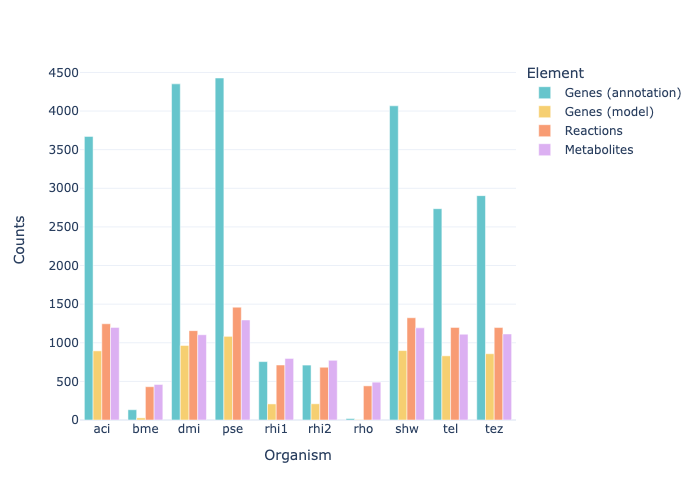

In [6]:
fig = plot_metabolic_models(
    metadata_df=metadata_df,
    config=config
)
fig.show("png")

save_fig(
    fig=fig,
    filename="gem-counts.jpg",
    config=config
)